<a href="https://colab.research.google.com/github/bhanuteja2001/COVID-19-XrayDetection/blob/main/DenseNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1BFc2Lt2N1swO8BKRvLMEyUhLzF52RFvr',
dest_path='/content/drive/MyDrive/CC/covid_image_data.zip',
unzip=True)

In [ ]:
!unzip '/content/drive/MyDrive/CC/covid_image_data.zip' -d '/content/drive/MyDrive/CC/'

In [1]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imutils import build_montages
from imutils import paths
import random
import cv2

In [3]:
imagePaths = list(paths.list_images("/content/drive/MyDrive/CC/covid_image_data/train"))
random.shuffle(imagePaths)
imagePaths = imagePaths[:21]

In [4]:
# initialize the list of images
images = []
# loop over the list of image paths
for imagePath in imagePaths:
  image = cv2.imread(imagePath)
  images.append(image)
# load the image and update the list of images
# construct the montages for the images
montages = build_montages(images, (128, 196), (7, 3))

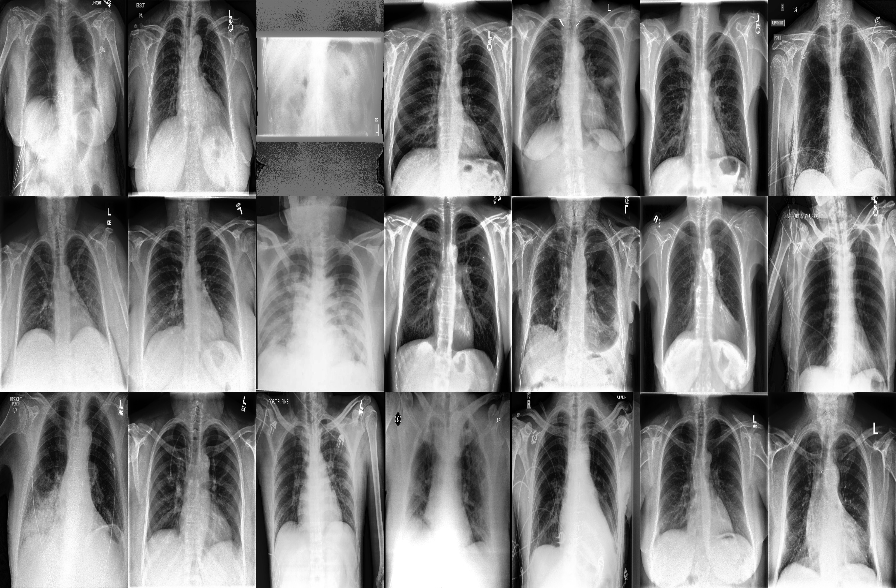

In [5]:
from google.colab.patches import cv2_imshow
for montage in montages:
  cv2_imshow(montage)

In [6]:
labels = pd.read_csv("/content/drive/MyDrive/CC/covid_image_data/Training_set_covid.csv")

labels.head()
file_paths = [[fname, '/content/drive/MyDrive/CC/covid_image_data/train/' + fname] for fname in labels['filename']]

if len(labels) == len(file_paths):
  print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
  print('Number of labels does not match the number of filenames')

images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()


train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data.head()

Number of labels i.e.  3479 matches the number of filenames i.e.  3479


,filename,filepaths,label
0,Image_1.jpg,/content/drive/MyDrive/CC/covid_image_data/tra...,1
1,Image_2.jpg,/content/drive/MyDrive/CC/covid_image_data/tra...,0
2,Image_3.jpg,/content/drive/MyDrive/CC/covid_image_data/tra...,0
3,Image_4.jpg,/content/drive/MyDrive/CC/covid_image_data/tra...,0
4,Image_5.jpg,/content/drive/MyDrive/CC/covid_image_data/tra...,0


In [7]:
test_image_order = pd.read_csv("/content/drive/MyDrive/CC/covid_image_data/Testing_set_covid.csv")
test_image_order.head()

file_paths_test = [[fname, '/content/drive/MyDrive/CC/covid_image_data/test/' + fname] for fname in test_image_order['filename']]

test_images = pd.DataFrame(file_paths_test, columns=['filename', 'filepaths'])
test_images.head()

,filename,filepaths
0,Image_1.jpg,/content/drive/MyDrive/CC/covid_image_data/tes...
1,Image_2.jpg,/content/drive/MyDrive/CC/covid_image_data/tes...
2,Image_3.jpg,/content/drive/MyDrive/CC/covid_image_data/tes...
3,Image_4.jpg,/content/drive/MyDrive/CC/covid_image_data/tes...
4,Image_5.jpg,/content/drive/MyDrive/CC/covid_image_data/tes...


In [8]:
data = []
image_size = 224
test_pixel_data = []

for i in range(len(train_data)):
  img_array = cv2.imread(train_data['filepaths'][i], cv2.COLOR_BGR2RGB)

  new_img_array = cv2.resize(img_array, (image_size, image_size))
  #new_img_array = cv2.GaussianBlur(new_img_array,(5,5),0)
  data.append([new_img_array, train_data['label'][i]])


for i in range(len(test_images)):
  img_array = cv2.imread(test_images['filepaths'][i], cv2.COLOR_BGR2RGB)

  new_img_array = cv2.resize(img_array, (image_size, image_size))
  #new_img_array = cv2.GaussianBlur(new_img_array,(5,5),0)
  test_pixel_data.append(new_img_array)

In [14]:
print(len(data),len(test_pixel_data))

3479 870


In [9]:
np.random.shuffle(data)

In [10]:
x = []
y = []

counter = 406

for image in data:
  x.append(image[0])
  y.append(image[1])

# converting x & y to numpy array as they are list
x = np.array(x)
y = np.array(y)

In [11]:
np.unique(y, return_counts=True)

(array([0, 1]), array([3073,  406]))

In [12]:
pd.Series(y).value_counts()

0    3073
1     406
dtype: int64

In [13]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42,stratify=y)

In [14]:
test_pixel_data = np.array(test_pixel_data)

test_pixel_data = test_pixel_data/255

print(X_train.shape,X_val.shape,test_pixel_data.shape)

(2783, 224, 224, 3) (696, 224, 224, 3) (870, 224, 224, 3)


In [15]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(X_train,y_train,batch_size=32)

val_generator = val_datagen.flow(X_val,y_val,batch_size=32)

In [16]:
pd.Series(y_val).value_counts(normalize=True)

0    0.883621
1    0.116379
dtype: float64

In [17]:
pd.Series(y_train).value_counts(normalize=True)

0    0.88322
1    0.11678
dtype: float64

In [24]:
print(X_train.shape,X_val.shape)

(2783, 224, 224, 3) (696, 224, 224, 3)


In [18]:
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

In [19]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=1e-5, verbose=0),
tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=10, verbose=1, mode='auto')]

In [20]:
from tensorflow.keras.applications import VGG16,VGG19,NASNetMobile,DenseNet201
from keras.layers import *
from keras.models import Sequential
from keras.regularizers import *
from tensorflow.keras.optimizers import Adam

In [21]:
def build_model():
  model = Sequential()

  conv_base = DenseNet201(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')
  model.add(conv_base)
  model.add(BatchNormalization())
  model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  model.add(BatchNormalization())
  # model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  # model.add(Dense(2048, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  # model.add(Dense(1024, activation='relu', kernel_regularizer=l1_l2(0.01)))
  # model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))
  for layer in model.layers:
    layer.trainable = True
  #train_layers = [layer for layer in conv_base.layers[::-1][:5]]
  """
  for layer in conv_base.layers:
  if layer in train_layers:
  layer.trainable = True
  """
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy',get_f1])

  return model

In [22]:
model = build_model()
model.summary()

74850304/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 1920)              18321984  
_________________________________________________________________
batch_normalization (BatchNo (None, 1920)              7680      
_________________________________________________________________
dense (Dense)                (None, 2048)              3934208   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 22,274,113
Trainable params: 22,037,121
Non-trainable params: 236,992
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [23]:
model.fit(train_generator,steps_per_epoch=87,epochs=100,validation_data=val_generator,validation_steps=22,callbacks=[cbs],class_weight={0:1,1:2})

Epoch 1/100
87/87 [==============================] - 188s 1s/step - loss: 628.2614 - accuracy: 0.7384 - get_f1: 0.4505 - val_loss: 480.4447 - val_accuracy: 0.8247 - val_get_f1: 0.2814
Epoch 2/100
87/87 [==============================] - 113s 1s/step - loss: 361.0745 - accuracy: 0.8980 - get_f1: 0.6727 - val_loss: 252.4089 - val_accuracy: 0.6796 - val_get_f1: 0.3337
Epoch 3/100
87/87 [==============================] - 113s 1s/step - loss: 170.5445 - accuracy: 0.9404 - get_f1: 0.7654 - val_loss: 100.3980 - val_accuracy: 0.5733 - val_get_f1: 0.3264
Epoch 4/100
87/87 [==============================] - 113s 1s/step - loss: 54.6612 - accuracy: 0.9680 - get_f1: 0.8583 - val_loss: 21.9001 - val_accuracy: 0.4943 - val_get_f1: 0.2983
Epoch 5/100
87/87 [==============================] - 113s 1s/step - loss: 9.6515 - accuracy: 0.9278 - get_f1: 0.7291 - val_loss: 4.9140 - val_accuracy: 0.9195 - val_get_f1: 0.4778
Epoch 6/100
87/87 [==============================] - 113s 1s/step - loss: 3.1444 - acc

In [24]:
preds = model.predict(X_val/255.0)
predictions = []
for i in preds:
    if i[0] > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)

In [25]:
from sklearn.metrics import f1_score,confusion_matrix
print(f1_score(y_val,predictions))
print(confusion_matrix(y_val,predictions))

0.830188679245283
[[603  12]
 [ 15  66]]


In [26]:
from sklearn.metrics import confusion_matrix,classification_report
target_names = ["COVID","Normal"]
print(classification_report(y_val,predictions, target_names=target_names))

              precision    recall  f1-score   support

       COVID       0.98      0.98      0.98       615
      Normal       0.85      0.81      0.83        81

    accuracy                           0.96       696
   macro avg       0.91      0.90      0.90       696
weighted avg       0.96      0.96      0.96       696

